# CS 584 :: Data Mining :: George Mason University :: Fall 2025


# Homework 1: KNN&PCA

- **100 points [6% of your final grade]**
- **Due Tuesday, Sep 28 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you should submit your notebook file to **Canvas** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs.

# New Section

## Part 1: KNN (50 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixels * 28 pixels). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label, and the following 784 values are the pixels of the image. First of all, let's load the data by executing the following code.

In [4]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive')


data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/train.txt', delimiter=',')
labels = data[:, 0].astype(int)
features = data[:, 1:]
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
array of labels: shape (60000,)
array of feature matrix: shape (60000, 784)


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's execute the following code to plot the first 4 samples to see how these images look like.

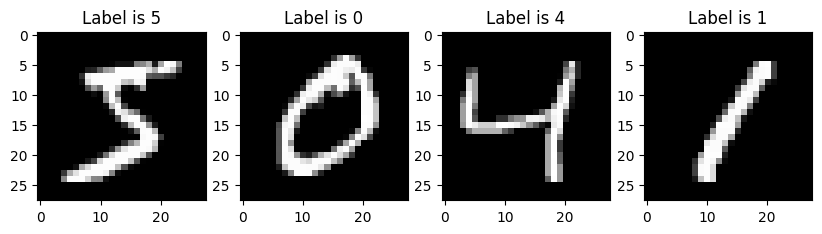

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

Next, you need to **randomly** select 20% samples (sampling without replacement) from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

**Note: You are NOT allowed to directly call APIs from an existing Machine Learning library like sklearn. But you can use the python 'random' library or the random module from 'numpy'**.

In [6]:
# Write your code here
import numpy as np


n = features.shape[0]
val_ratio = 0.20
val_size = int(n * val_ratio)


val_idx = np.random.choice(n, size= val_size , replace=False)


train_idx = [i for i in range(n) if i not in val_idx]

X_train = features[train_idx]
y_train = labels[train_idx]
X_test   = features[val_idx]
y_test   = labels[val_idx]



print("Total samples :",n)
print("Validation samples :",X_test.shape[0])
print("Training samples :",X_train.shape[0])






Total samples : 60000
Validation samples : 12000
Training samples : 48000


Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an existing Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

**Note: You can install and use the 'tqdm' library to help you track the process of your algorithm. Details are 'https://github.com/tqdm/tqdm'**

**Note: It takes 30~60 min to execute the KNN algorithm.**

In [7]:
import numpy as np

K = 10

y_train = np.asarray(y_train)
y_test  = np.asarray(y_test)

def predict_one(x, X_train, y_train, k=K):

    dists = np.sqrt(np.sum((X_train - x) ** 2, axis=1))
    k = min(k, len(X_train))
    nn_indices = np.argsort(dists)[:k]
    nn_labels = y_train[nn_indices]
    values, counts = np.unique(nn_labels, return_counts=True)

    pred_label = values[np.argmax(counts)]
    return pred_label

y_pred_val = np.empty_like(y_test)

for i, x in enumerate(X_test):

    if (i % 500) == 0:
        print(f"Processing sample {i}/{len(X_test)} ...")
    y_pred_val[i] = predict_one(x, X_train, y_train, k=K)

acc = np.mean(y_pred_val == y_test)
print("accuracy:", acc)


Processing sample 0/12000 ...
Processing sample 500/12000 ...
Processing sample 1000/12000 ...
Processing sample 1500/12000 ...
Processing sample 2000/12000 ...
Processing sample 2500/12000 ...
Processing sample 3000/12000 ...
Processing sample 3500/12000 ...
Processing sample 4000/12000 ...
Processing sample 4500/12000 ...
Processing sample 5000/12000 ...
Processing sample 5500/12000 ...
Processing sample 6000/12000 ...
Processing sample 6500/12000 ...
Processing sample 7000/12000 ...
Processing sample 7500/12000 ...
Processing sample 8000/12000 ...
Processing sample 8500/12000 ...
Processing sample 9000/12000 ...
Processing sample 9500/12000 ...
Processing sample 10000/12000 ...
Processing sample 10500/12000 ...
Processing sample 11000/12000 ...
Processing sample 11500/12000 ...
accuracy: 0.9664166666666667


Then, please write code to compute the **Accuracy**, and **Micro-averaged and Macro-averaged F1 scores** to evaluate the performance on the validation set.

Print out these three metrics.

In [8]:
# Write your code here



def accuracy(y_true, y_pred):

    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)


def micro_f1(y_true, y_pred):
    tp = 0
    fp = 0
    fn = 0
    classes = np.unique(y_true)

    for c in classes:
        for i in range(len(y_true)):
            if y_true[i] == c and y_pred[i] == c:
                tp += 1
            elif y_true[i] != c and y_pred[i] == c:
                fp += 1
            elif y_true[i] == c and y_pred[i] != c:
                fn += 1

    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if precision + recall == 0:
        return 0
    return 2 * precision * recall / (precision + recall)


def macro_f1(y_true, y_pred):
    classes = np.unique(y_true)
    f1_scores = []

    for c in classes:
        tp = fp = fn = 0
        for i in range(len(y_true)):
            if y_true[i] == c and y_pred[i] == c:
                tp += 1
            elif y_true[i] != c and y_pred[i] == c:
                fp += 1
            elif y_true[i] == c and y_pred[i] != c:
                fn += 1

        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        if precision + recall == 0:
            f1 = 0
        else:
            f1 = 2 * precision * recall / (precision + recall)

        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores)



print("Accuracy   :", accuracy(y_test, y_pred_val))
print("Micro-F1   :", micro_f1(y_test, y_pred_val))
print("Macro-F1   :", macro_f1(y_test, y_pred_val))



Accuracy   : 0.9664166666666667
Micro-F1   : 0.9664166666666667
Macro-F1   : 0.9663638957039387


## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library to compute SVD:**

*u, s, v = np.linalg.svd(a, full_matrices=False)*


**Note: You should only use the training set to compute PCA without using validation set.**

In [9]:
# your code is here
import numpy as np

top_k = 50
train_mean = X_train.mean(axis=0)

X_train_centered = X_train - train_mean
U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)
W = Vt[:top_k, :]

Z_train = (X_train - train_mean) @ W.T
Z_val = (X_test - train_mean) @ W.T


Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced training data and predict the labels for the dimension-reduced validation set.

Print out the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

**Note: When you calculate the centered data for the validation set, you can calculate the mean feature values just by the validation data itself.**

In [10]:
import numpy as np

val_mean = X_test.mean(axis=0)
Z_val = (X_test - train_mean) @ W.T



K = 10

def dist_l2(a, b):
    diff = a - b
    return float(np.dot(diff, diff)) ** 0.5

def predict_one_knn(z, Ztr, ytr, k=K):
    dists = [dist_l2(z, ztr) for ztr in Ztr]
    nn = np.argsort(dists)[:k]
    labs, cnt = np.unique(ytr[nn], return_counts=True)
    return labs[np.argmax(cnt)]

y_pred = np.array([predict_one_knn(z, Z_train, y_train, k=K) for z in Z_val])


def accuracy(y_true, y_pred):
    return sum(int(y_true[i] == y_pred[i]) for i in range(len(y_true))) / len(y_true)

def micro_f1(y_true, y_pred):
    tp = fp = fn = 0
    classes = np.unique(y_true)
    for c in classes:
        for i in range(len(y_true)):
            if y_true[i] == c and y_pred[i] == c:
                tp += 1
            elif y_true[i] != c and y_pred[i] == c:
                fp += 1
            elif y_true[i] == c and y_pred[i] != c:
                fn += 1
    p = 0 if (tp + fp) == 0 else tp / (tp + fp)
    r = 0 if (tp + fn) == 0 else tp / (tp + fn)
    return 0 if (p + r) == 0 else 2 * p * r / (p + r)

def macro_f1(y_true, y_pred):
    classes = np.unique(y_true)
    f1s = []
    for c in classes:
        tp = fp = fn = 0
        for i in range(len(y_true)):
            if y_true[i] == c and y_pred[i] == c:
                tp += 1
            elif y_true[i] != c and y_pred[i] == c:
                fp += 1
            elif y_true[i] == c and y_pred[i] != c:
                fn += 1
        p = 0 if (tp + fp) == 0 else tp / (tp + fp)
        r = 0 if (tp + fn) == 0 else tp / (tp + fn)
        f1s.append(0 if (p + r) == 0 else 2 * p * r / (p + r))
    return float(np.mean(f1s))

print(f"Accuracy  (PCA-{top_k}, k={K}): {accuracy(y_test, y_pred):.4f}")
print(f"Micro-F1  (PCA-{top_k}, k={K}): {micro_f1(y_test, y_pred):.4f}")
print(f"Macro-F1  (PCA-{top_k}, k={K}): {macro_f1(y_test, y_pred):.4f}")


Accuracy  (PCA-50, k=10): 0.9729
Micro-F1  (PCA-50, k=10): 0.9729
Macro-F1  (PCA-50, k=10): 0.9728


## Part 3: Tune Hyperparameter (20 points)

In this part, you need to do your best to tune the hyperparameters in KNN and PCA to build the best model.

You should tune three hyperparameters with the training data provided:

- the number of nearest neighbors in KNN
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

**Hint: To save your time, you can subsample 50% (or even less) of the training data to tune hyperparameters.**

**Note: For each hyperparameter, you must try at least 2 different values.**

In [12]:
import numpy as np
from collections import Counter
from tqdm import tqdm


np.random.seed(42)

def euclidean_distance(X, y):

    d = X - y
    return np.sqrt(np.sum(d*d, axis=1))

def l1_distance(X, y):
    return np.sum(np.abs(X - y), axis=1)

def cosine_distance(X, y, Xn=None, yn=None):

    if Xn is None:
        Xn = np.linalg.norm(X, axis=1)
    if yn is None:
        yn = np.linalg.norm(y)
    Xn = np.where(Xn == 0, 1e-12, Xn)
    yn = 1e-12 if yn == 0 else yn
    sim = (X @ y) / (Xn * yn)
    sim = np.clip(sim, -1.0, 1.0)
    return 1.0 - sim

DIST = {"euclidean": euclidean_distance, "l1": l1_distance, "cosine": cosine_distance}

def knn_predict_custom(Xtr, ytr, Xq, k=5, metric='euclidean'):
    preds = []
    dfunc = DIST[metric]
    tr_norm = None
    if metric == 'cosine':
        tr_norm = np.linalg.norm(Xtr, axis=1)
    for i in tqdm(range(len(Xq)), leave=False):
        if metric == 'cosine':
            y = Xq[i]; yn = np.linalg.norm(y)
            d = dfunc(Xtr, y, Xn=tr_norm, yn=yn)
        else:
            d = dfunc(Xtr, Xq[i])

        idx = np.argpartition(d, k)[:k]
        labs = ytr[idx]
        vals, cnts = np.unique(labs, return_counts=True)
        preds.append(vals[np.argmax(cnts)])
    return np.array(preds)

def pca_fit(X):
    mu = X.mean(axis=0)
    Xc = X - mu
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    return mu, Vt

def pca_project(X, mu, Vt, n_comp):
    Xc = X - mu
    return Xc @ Vt[:n_comp].T


def stratified_train_val_split(X, y, val_ratio=0.5, seed=42):
    rng = np.random.default_rng(seed)
    y = np.asarray(y)
    classes = np.unique(y)
    train_idx = []
    val_idx   = []
    for c in classes:
        idx_c = np.where(y == c)[0]
        rng.shuffle(idx_c)
        n_val = int(round(val_ratio * len(idx_c)))
        val_idx.append(idx_c[:n_val])
        train_idx.append(idx_c[n_val:])
    train_idx = np.concatenate(train_idx) if len(train_idx) else np.array([], dtype=int)
    val_idx   = np.concatenate(val_idx)   if len(val_idx)   else np.array([], dtype=int)
    return train_idx, val_idx

X_all = features
y_all = labels

tr_pool_idx, val_idx = stratified_train_val_split(X_all, y_all, val_ratio=0.5, seed=42)

sub_ratio = 0.5
rng = np.random.default_rng(42)
sub_pool = rng.choice(tr_pool_idx, size=int(len(tr_pool_idx) * sub_ratio), replace=False)

X_tr = X_all[sub_pool]
y_tr = y_all[sub_pool]
X_val = X_all[val_idx]
y_val = y_all[val_idx]


mu_tr, Vt_full = pca_fit(X_tr)

pca_dims = [20, 50, 100]
k_values = [5, 10]
metrics  = ['euclidean', 'l1', 'cosine']

best_acc = -1.0
best_params = {}
summary = {}

for dim in pca_dims:
    Ztr  = pca_project(X_tr,  mu_tr, Vt_full, dim)
    Zval = pca_project(X_val, mu_tr, Vt_full, dim)
    for k in k_values:
        for m in metrics:
            print(f"Testing PCA={dim}, K={k}, distance={m}")
            y_pred = knn_predict_custom(Ztr, y_tr, Zval, k=k, metric=m)
            acc = float(np.mean(y_pred == y_val))
            print(f"Validation Accuracy: {acc:.4f}\n")

            summary[(m, dim, k)] = acc
            if acc > best_acc:
                best_acc = acc
                best_params = {'pca_dim': dim, 'k': k, 'distance': m}


def get_acc(metric, dim, k):
    v = summary.get((metric, dim, k))
    return "…" if v is None else f"{v:.4f}"

print("\n================ CLEAN VALIDATION SUMMARY ================")

print("\nEuclidean distance")
for dim in pca_dims:
    print(f"\nPCA = {dim}")
    print(f"k = 5  → Accuracy = {get_acc('euclidean', dim, 5)}")
    print(f"k = 10 → Accuracy = {get_acc('euclidean', dim, 10)}")

print("\nL1 (Manhattan) distance")
for dim in pca_dims:
    print(f"\nPCA = {dim}")
    print(f"k = 5  → Accuracy = {get_acc('l1', dim, 5)}")
    print(f"k = 10 → Accuracy = {get_acc('l1', dim, 10)}")

print("\nCosine distance")
for dim in pca_dims:
    print(f"\nPCA = {dim}")
    print(f"k = 5  → Accuracy = {get_acc('cosine', dim, 5)}")
    print(f"k = 10 → Accuracy = {get_acc('cosine', dim, 10)}")

print("\nBest Hyperparameters (by Validation Accuracy):", best_params)
print("Best Validation Accuracy:", f"{best_acc:.4f}")


Testing PCA=20, K=5, distance=euclidean


Validation Accuracy: 0.9564

Testing PCA=20, K=5, distance=l1


Validation Accuracy: 0.9520

Testing PCA=20, K=5, distance=cosine


Validation Accuracy: 0.9504

Testing PCA=20, K=10, distance=euclidean


Validation Accuracy: 0.9541

Testing PCA=20, K=10, distance=l1


Validation Accuracy: 0.9505

Testing PCA=20, K=10, distance=cosine


Validation Accuracy: 0.9459

Testing PCA=50, K=5, distance=euclidean


Validation Accuracy: 0.9625

Testing PCA=50, K=5, distance=l1


Validation Accuracy: 0.9583

Testing PCA=50, K=5, distance=cosine


Validation Accuracy: 0.9602

Testing PCA=50, K=10, distance=euclidean


Validation Accuracy: 0.9590

Testing PCA=50, K=10, distance=l1


Validation Accuracy: 0.9544

Testing PCA=50, K=10, distance=cosine


Validation Accuracy: 0.9566

Testing PCA=100, K=5, distance=euclidean


Validation Accuracy: 0.9596

Testing PCA=100, K=5, distance=l1


Validation Accuracy: 0.9508

Testing PCA=100, K=5, distance=cosine


Validation Accuracy: 0.9602

Testing PCA=100, K=10, distance=euclidean


Validation Accuracy: 0.9539

Testing PCA=100, K=10, distance=l1


Validation Accuracy: 0.9434

Testing PCA=100, K=10, distance=cosine


Validation Accuracy: 0.9548


================ CLEAN VALIDATION SUMMARY ================

Euclidean distance

PCA = 20
k = 5  → Accuracy = 0.9564
k = 10 → Accuracy = 0.9541

PCA = 50
k = 5  → Accuracy = 0.9625
k = 10 → Accuracy = 0.9590

PCA = 100
k = 5  → Accuracy = 0.9596
k = 10 → Accuracy = 0.9539

L1 (Manhattan) distance

PCA = 20
k = 5  → Accuracy = 0.9520
k = 10 → Accuracy = 0.9505

PCA = 50
k = 5  → Accuracy = 0.9583
k = 10 → Accuracy = 0.9544

PCA = 100
k = 5  → Accuracy = 0.9508
k = 10 → Accuracy = 0.9434

Cosine distance

PCA = 20
k = 5  → Accuracy = 0.9504
k = 10 → Accuracy = 0.9459

PCA = 50
k = 5  → Accuracy = 0.9602
k = 10 → Accuracy = 0.9566

PCA = 100
k = 5  → Accuracy = 0.9602
k = 10 → Accuracy = 0.9548

Best Hyperparameters (by Validation Accuracy): {'pca_dim': 50, 'k': 5, 'distance': 'euclidean'}
Best Validation Accuracy: 0.9625


Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?






**Final hyperparameter setting:**

* PCA dimensions: **50**
* Number of nearest neighbors (K): **5**
* Distance metric: **Euclidean distance**

**How I tuned them:**
I split the provided training data into a training subset and a disjoint validation subset (about 50% each). I then performed a grid search over all three hyperparameters. For PCA, I tried keeping 20, 50, and 100 components; for K I tried 5 and 10 neighbors; and for distance I tested Euclidean, L1 (Manhattan), and Cosine. For each combination, I fit PCA on the training subset, projected both train and validation sets using that mean and component matrix, and then ran KNN on the validation set.

**Choices I tried:**

* **PCA dims:** {20, 50, 100}
* **K:** {5, 10}
* **Distance:** {Euclidean, L1, Cosine}

After evaluating all combinations, the setting that gave the highest validation accuracy (**0.9625**) was **PCA = 50, K = 5, Euclidean distance**. This is my final hyperparameter choice to carry forward to the test set.


Now, let's test if your best hyperparameter setting really works. We will load a separate testing dataset to test your choice. Let's load the testing data by executing the following code.

In [13]:
test_features = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/test.txt", delimiter=',')
test_labels = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/test_label.txt")
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))
print('array of testing labels: shape ' + str(np.shape(test_labels)))

array of testing feature matrix: shape (10000, 784)
array of testing labels: shape (10000,)


Please apply the KNN model with the best hyperparameter setting you find above to this testing set, and report the Accuracy, and Micro-averaged and Macro-averaged F1 scores of your best model on the testing set.

Print out these three metrics.

In [16]:
best_params = {
    'pca_dim': 50,
    'k': 5,
    'distance': 'euclidean'
}


def euclidean_distance(X, y): return np.sqrt(np.sum((X - y)**2, axis=1))
def l1_distance(X, y): return np.sum(np.abs(X - y), axis=1)
def cosine_distance(X, y, Xn=None, yn=None):
    if Xn is None: Xn = np.linalg.norm(X, axis=1)
    if yn is None: yn = np.linalg.norm(y)
    Xn = np.where(Xn == 0, 1e-12, Xn)
    yn = 1e-12 if yn == 0 else yn
    sim = (X @ y) / (Xn * yn)
    return 1.0 - np.clip(sim, -1.0, 1.0)
DIST = {"euclidean": euclidean_distance, "l1": l1_distance, "cosine": cosine_distance}

def knn_predict(Xtr, ytr, Xq, k, metric):
    preds, dfunc = [], DIST[metric]
    tr_norm = np.linalg.norm(Xtr, axis=1) if metric == 'cosine' else None
    for i in range(len(Xq)):
        if metric == 'cosine':
            y = Xq[i]; yn = np.linalg.norm(y)
            d = dfunc(Xtr, y, Xn=tr_norm, yn=yn)
        else:
            d = dfunc(Xtr, Xq[i])
        idx = np.argpartition(d, k)[:k]
        labs = ytr[idx]
        vals, cnts = np.unique(labs, return_counts=True)
        preds.append(vals[np.argmax(cnts)])
    return np.array(preds)


def pca_fit(X):
    mu = X.mean(axis=0); Xc = X - mu
    U,S,Vt = np.linalg.svd(Xc, full_matrices=False)
    return mu, Vt
def pca_project(X, mu, Vt, n): return (X - mu) @ Vt[:n].T


def confusion_matrix(y_true, y_pred):
    y_true = np.asarray(y_true).astype(int).ravel()
    y_pred = np.asarray(y_pred).astype(int).ravel()
    labels = np.unique(np.concatenate([y_true, y_pred]))
    lab2idx = {lab:i for i, lab in enumerate(labels)}
    n = len(labels)
    C = np.zeros((n, n), dtype=int)
    for t, p in zip(y_true, y_pred):
        C[lab2idx[t], lab2idx[p]] += 1
    return C

def scores(C):
    tp = np.diag(C); fp = C.sum(0)-tp; fn = C.sum(1)-tp
    prec = np.where(tp+fp>0, tp/(tp+fp),0)
    rec  = np.where(tp+fn>0, tp/(tp+fn),0)
    f1   = np.where(prec+rec>0, 2*prec*rec/(prec+rec),0)
    macro = f1.mean()
    TP,FP,FN = tp.sum(), fp.sum(), fn.sum()
    micro_p = TP/(TP+FP); micro_r = TP/(TP+FN)
    micro = 2*micro_p*micro_r/(micro_p+micro_r)
    acc = tp.sum()/C.sum()
    return acc, micro, macro

mu, Vt = pca_fit(features)
Ztr  = pca_project(features, mu, Vt, best_params['pca_dim'])
Zte  = pca_project(test_features, mu, Vt, best_params['pca_dim'])


y_pred = knn_predict(Ztr, labels, Zte, k=best_params['k'], metric=best_params['distance'])
C = confusion_matrix(test_labels, y_pred)
acc, micro_f1, macro_f1 = scores(C)

print(f"Test Accuracy:   {acc:.4f}")
print(f"Test Micro-F1:   {micro_f1:.4f}")
print(f"Test Macro-F1:   {macro_f1:.4f}")


Test Accuracy:   0.9748
Test Micro-F1:   0.9748
Test Macro-F1:   0.9747
